## Bivariate Heat Maps

**Heat Maps**

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's **hist2d** function.

In [8]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [9]:
# load data
fuel_econ = pd.read_csv('../../Datasets/fuel_econ.csv')

fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [28]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


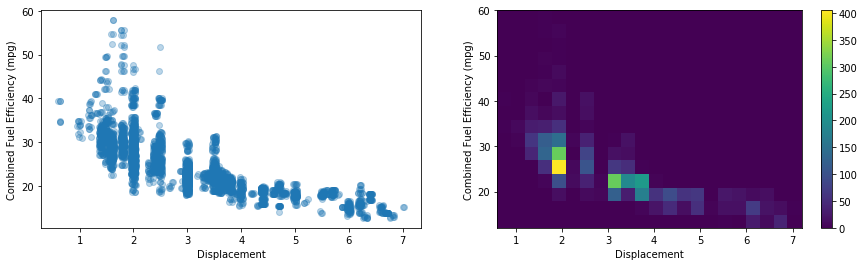

In [31]:
fig = plt.figure(figsize=[15, 4])

plt.subplot(1, 2, 1)
sb.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=0.04, fit_reg=False, scatter_kws={'alpha':0.3})
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency (mpg)');

plt.subplot(1, 2, 2)
binx = np.arange(0.6, 7+0.3, 0.3)
biny = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', bins=[binx, biny]);
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency (mpg)');

As the color in the heatmap gets brighter and moves from blue to yellow, the higher the count of points in the corresponding cell.

**Additional Variations**

To select a different color palette, you can set the "cmap" parameter in **hist2d**. The most convenient way of doing this is to set the **"cmap"** value as a string referencing a built-in Matplotlib palette. 
Here, we are reversing the default **"viridis"** color palette, by setting 
> **cmap = 'viridis_r'**.

The **"cmin"** parameter specifies the minimum value in a cell before it will be plotted.
> **cmin = 0.5** 

Passing **cmin** parameter to the **hist2d** call, means that a cell will only get colored if it contains at least one point.

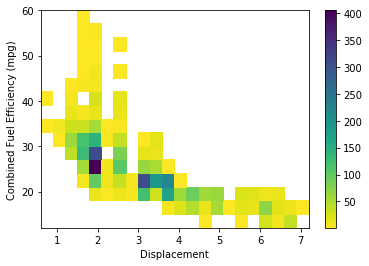

In [37]:
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', bins=[binx, biny], cmin=0.5, cmap='viridis_r');
plt.colorbar();
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency (mpg)');

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. 

From hist2d, this requires the addition of text elements one by one. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

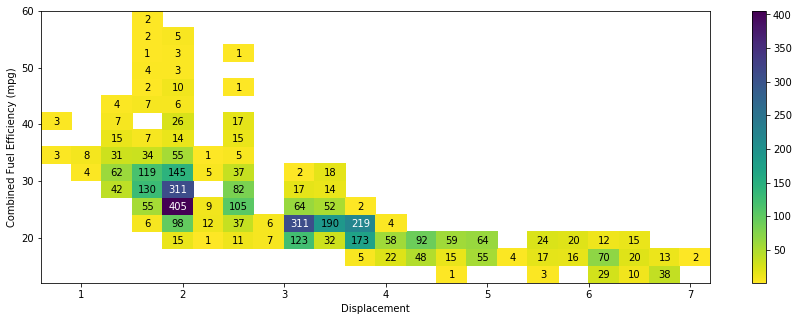

In [57]:
plt.figure(figsize=[15, 5])
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', bins=[binx, biny], cmin=0.5, cmap='viridis_r')
plt.colorbar();
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency (mpg)');

counts = h2d[0]  # data in rows and columns

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c > 200:
            plt.text(binx[i]+0.15, biny[j]+1.5, int(c), color='white', ha='center', va='center')
        elif c >= 0.5:
            plt.text(binx[i]+0.15, biny[j]+1.5, int(c), color='black', ha='center', va='center')

In [54]:
fuel_econ.shape[0]

3929

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves. You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted.